<a href="https://colab.research.google.com/github/Rusira54321/spamDetectorbackend/blob/main/EmailSpam_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [54]:
column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "spam"
]

In [55]:
df = pd.read_csv('spambase.data',header=None, names=column_names)

In [56]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [57]:
df.shape

(4601, 58)

In [58]:
df['spam'].value_counts()

,count
spam,
0,2788
1,1813


In [59]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [60]:
correlations = df.corr()['spam'].sort_values(ascending=False)
print(correlations.head(20))  # Top spam-indicating features

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
Name: spam, dtype: float64


In [61]:
X = df.drop("spam", axis=1)
y = df["spam"]

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline23 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])
pipeline23.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [64]:
# Cross-validation on training set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline23, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores):.4f}")

Cross-validated accuracy: 0.9293


In [65]:
from sklearn.metrics import confusion_matrix
y_pred = pipeline23.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       558
           1       0.89      0.91      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix:
[[517  41]
 [ 31 332]]


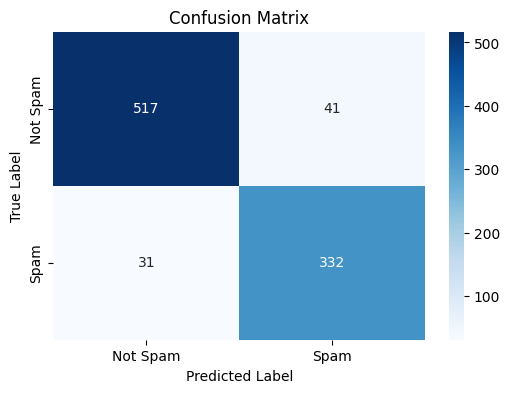

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [67]:
import joblib

# Save the trained model to a file
joblib.dump(pipeline23, 'logistic_model.pkl')

['logistic_model.pkl']

Drop weak features using correlation or L1 penalty (Lasso) imrove accuracy

In [68]:
# Correlation with target
correlation = df.corr()['spam'].drop('spam')
# Set a correlation threshold (e.g., > 0.1 or < -0.1)
strong_features = correlation[abs(correlation) > 0.1].index.tolist()

print("Selected features:", strong_features)

# Filter dataset to include only strong features
X_filtered = df[strong_features]
y = df['spam']

Selected features: ['word_freq_make', 'word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_people', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_pm', 'word_freq_meeting', 'word_freq_original', 'word_freq_re', 'word_freq_edu', 'char_freq_!', 'char_freq_$', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']


In [69]:
length = len(strong_features)
print(length)

42


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y
)

In [71]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [74]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [76]:
import joblib

# Assume you have a trained model called 'model'
joblib.dump(pipeline, 'logistic_model1.pkl')

['logistic_model1.pkl']

In [77]:
# Cross-validation on training set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores):.4f}")

Cross-validated accuracy: 0.9285


In [78]:
from sklearn.metrics import confusion_matrix
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       558
           1       0.89      0.91      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921

Confusion Matrix:
[[517  41]
 [ 31 332]]


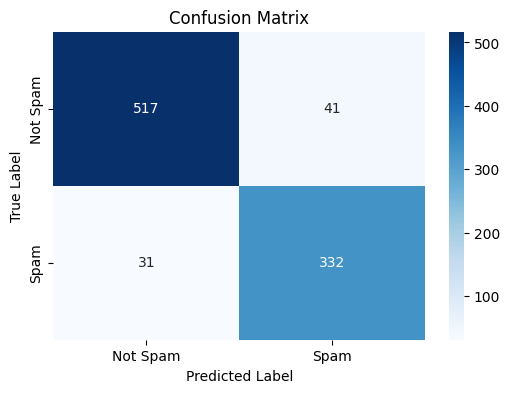

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [80]:
# Predict probabilities on test set
y_probs = pipeline.predict_proba(X_test)[:, 1]

In [81]:
# Custom threshold
threshold = 0.7
y_pred_custom = (y_probs >= threshold).astype(int)

In [82]:
# Confusion matrix with custom threshold
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix with threshold 0.7:")
print(cm)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       558
           1       0.94      0.84      0.89       363

    accuracy                           0.91       921
   macro avg       0.92      0.90      0.91       921
weighted avg       0.92      0.91      0.91       921

Confusion Matrix with threshold 0.7:
[[537  21]
 [ 58 305]]


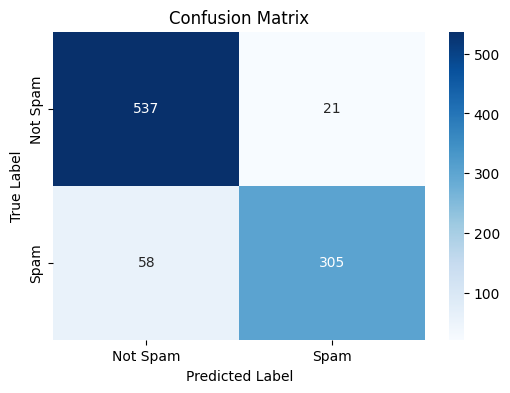

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [84]:
y_probs = pipeline.predict_proba(X_test)[:, 1]

In [85]:
# Custom threshold
threshold = 0.55
y_pred_custom = (y_probs >= threshold).astype(int)

In [86]:
# Confusion matrix with custom threshold
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))
cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix with threshold 0.55:")
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       558
           1       0.91      0.91      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

Confusion Matrix with threshold 0.55:
[[527  31]
 [ 34 329]]


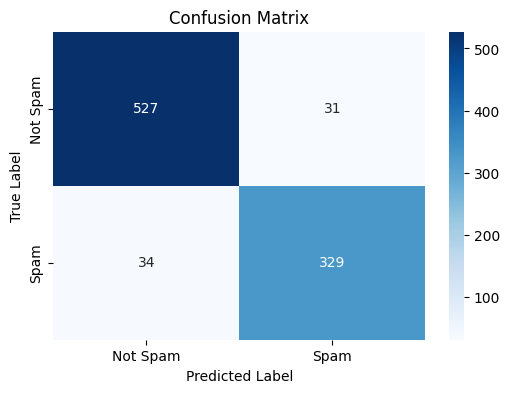

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Correlation with target
correlation = df.corr()['spam'].drop('spam')
# Set a correlation threshold (e.g., > 0.1 or < -0.1)
strong_features = correlation[abs(correlation) > 0.15].index.tolist()

print("Selected features:", strong_features)

Selected features: ['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_receive', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_labs', 'word_freq_1999', 'char_freq_!', 'char_freq_$', 'capital_run_length_longest', 'capital_run_length_total']


In [50]:
X_filtered = df[strong_features]

In [51]:
y = df['spam']

Cross-validated accuracy: 0.9043
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       558
           1       0.88      0.90      0.89       363

    accuracy                           0.91       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.91      0.91      0.91       921

Confusion Matrix:
[[514  44]
 [ 37 326]]


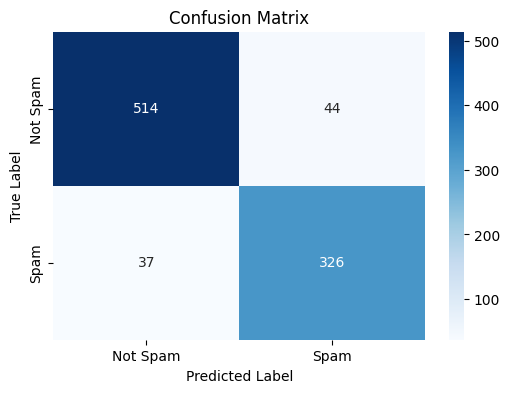

In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y, test_size=0.2, random_state=42, stratify=y
)


from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000))
])


pipeline.fit(X_train, y_train)


# Cross-validation on training set
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores):.4f}")



from sklearn.metrics import confusion_matrix
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()